# Evaluierung des SIFT Detektors

In [72]:
import numpy as np
import pandas as pd
import cv2
import os
from typing import List, Tuple, Any
import eval_repeatability as er
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline

### Variablen


In [34]:
project_names = ['sift', 'lift', 'superpoint', 'tilde']
detector_names = ['SIFT', 'LIFT', 'SuperPoint', 'TILDE']

project_name = 'sift'
detector_name = 'SIFT'
allowed_extensions = ['.png']
webcam_sets = ['chamonix', 'courbevoie', 'frankfurt', 'mexico', 'panorama', 'stlouis']
episolons = [1, 2, 3, 4, 5]
webcam_path = '../../data/webcam'
output_path = '../../outputs'

### Funktionen

### Bildersets
- Namensliste der Files in Bilderset finden
- Passende .csv Files laden

### Welche Daten werden erfasst?
#### Direkte Daten
- Anzahl an Keypunkten pro Bild

#### Aggregierte Daten
- Anzahl Keypunkte insgesamt (Subpixel Level)
- Anzahl an wiederholbaren Keypunkten insgesamt
- Ratio wiederholbare Keypunkte ingesamt und Anzahl Keypunkte insgesamt (Subpixel Level)
- Ratio wiederholbare Keypunkte ingesamt und Anzahl Keypunkte insgesamt (Pixel Level)
- Durchschnittliche Anzahl an Keypunkten pro Bild (Subpixel Level)



### Bilderset: Chamonix

In [41]:
set_name = webcam_sets[0]
data_dir = os.path.join(webcam_path, webcam_sets[0])
output_dir = os.path.join(output_path, 'webcam', set_name, 'keypoints')
set_name

'chamonix'

In [42]:
# Get image names (without extension) from the data directory
file_names = sorted(er.get_file_names(data_dir, allowed_extensions))

In [43]:
# Create the .csv file names.
kpts_files = ['kpts_{}__{}_{}.csv'.format(project_name, file_name, detector_name) for file_name in file_names]

Die Position an der 1 steht bedeutet:
- Reihe `i` ist der `i-te` Keypunkt in Query Image
- Spalte `j` ist der `j-te` Keypunkt in Source Image

Trage im Resultat ein, dass der `j-te` Keypunkt des Source Bildes auch im Query Bild gefunden wurde.

Nachdem alle Query Bilder verabeitet wurden, finde die Keypunkte, die in jedem Query Bild gefunden wurden.

Dies sind die Repeatable Keypoints.

Let's find out, how repeatability decreases, as the number of images increases. For each new image, count the number of repeatable keypoints up to this image.

In [162]:
N = 2
project_names = ['sift', 'lift', 'superpoint', 'tilde']
detector_names = ['SIFT', 'LIFT', 'SuperPoint', 'TILDE']
webcam_sets = ['chamonix', 'courbevoie', 'frankfurt', 'mexico', 'panorama', 'stlouis'][:2]

In [163]:
epsilons = [10]
detector_results = {}

In [170]:
for epsilon in epsilons:
    detector_results[epsilon] = {}
    for set_name in webcam_sets:
        detector_results[epsilon][set_name] = {}
        
        data_dir = os.path.join(webcam_dir, set_name)
        output_dir = os.path.join(output_path, 'webcam', set_name, 'keypoints')
        file_names = sorted(er.get_file_names(data_dir, allowed_extensions))
        
        for (project_name, detector_name) in zip(project_names, detector_names):
            kpts_files = ['kpts_{}__{}_{}.csv'.format(project_name, file_name, detector_name) for file_name in file_names]
            res = er.find_repeatable_keypoints(kpts_files, output_dir, epsilon=epsilon)
            detector_results[epsilon][set_name][project_name] = er.get_repeatability_for_n_images(res)


In [171]:
detector_results[10].keys()

dict_keys(['chamonix', 'courbevoie'])

<Figure size 1152x648 with 0 Axes>

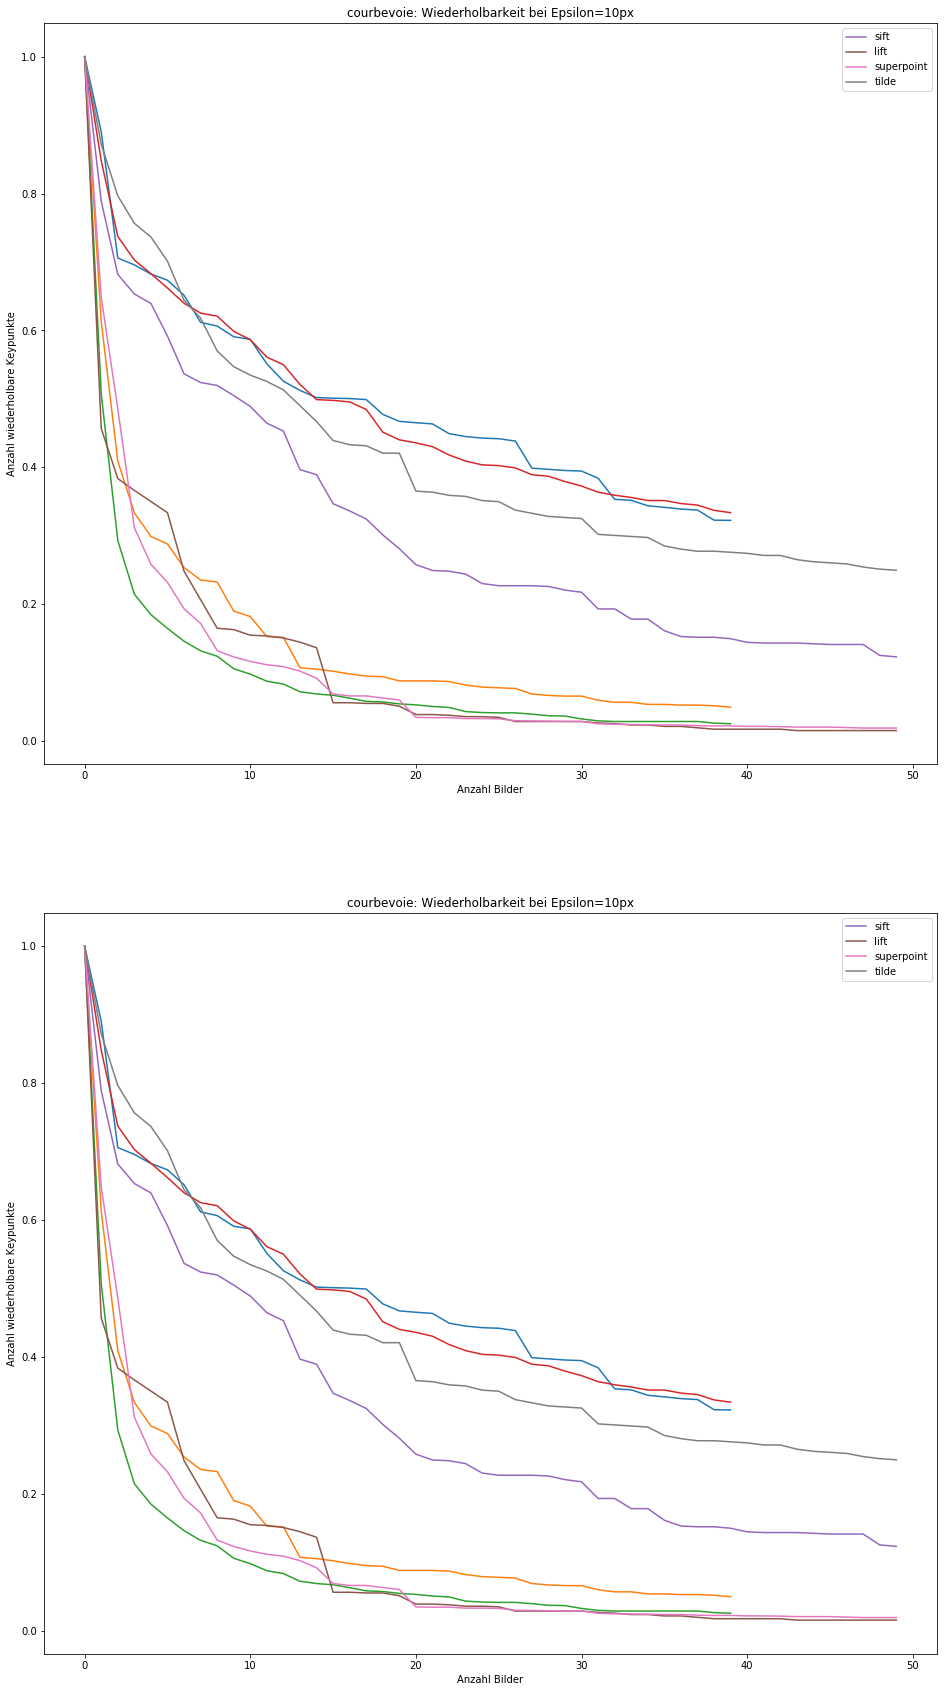

In [172]:
plt.rcParams['figure.figsize'] = (16, 30)
plt.figure(figsize=(16, 9))
len_ws = len(webcam_sets)
fig, axes = plt.subplots(len_ws)

for i in range(len_ws):
    ax = axes if len_ws == 1 else axes[i]
    
    for epsilon in list(detector_results.keys()):
        for set_name in list(detector_results[epsilon].keys()):
            handles = []
            project_names = list(detector_results[epsilon][set_name].keys())
            
            for project_name in project_names:
                ys = detector_results[epsilon][set_name][project_name]
                ys = [yi / ys[0] for yi in ys]

                h,  = ax.plot(np.arange(len(ys)), ys, label=project_name)
                handles.append(h)
                ax.set_title('{}: Wiederholbarkeit bei Epsilon={}px'.format(set_name, epsilon))
                ax.set_xlabel('Anzahl Bilder')
                ax.set_ylabel('Anzahl wiederholbare Keypunkte')
            
                ax.legend(handles=handles, labels=project_names)
